سهند نوعی 9923087 HW1

لینک کولب: https://colab.research.google.com/drive/11Gt27Ro1mh_DreAMgc3bZd2v0qcatiRY#scrollTo=pvAE-6pYjGdM

<div dir=rtl>
<font size = "6">قبل از هر کاری، با استفاده از مسیری که در خط پایین ذکر شده، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.</font>
</div>

<div>
<font size = "4">
File --> Save a copy in Drive
</font>
</div>

# Question 0: Run the cell below without modifying it.

<div dir=rtl>
<font size = "6">بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید.</font>
</div>

In [1]:
#@title Downloading the necessary data for this homework
!pip install pydicom
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37' -O 'HW1_data.zip'
!unzip HW1_data.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.4 MB/s eta 0:00:00
--2023-11-09 09:20:33--  https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37
Resolving drive.google.com (drive.google.com)... 74.125.23.138, 74.125.23.113, 74.125.23.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k9m4hp57vpfavri7q0c33koqsddqqc7d/1699521600000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=14fa99b5-b583-489c-a7cb-0a306211cfca [following]
--2023-11-09 09:20:35--  https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k9m4hp57vpfavri7q0c33koqsddqqc7d/1699521600000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=14fa99b5-b583-489c-a7cb-0a306211cfca
Resolving doc-0k-2g-docs.googleuser

# The Imports

In [2]:
###
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pydicom
###

# Any Helper Functions

<div dir=rtl>
<font size = "6">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ای (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید.</font>
</div>

In [3]:
###
def standardization(image, title):
    max_intensity = np.amax(image)
    min_intensity = np.amin(image)
    plt.title(title, color="red")
    plt.imshow(image, cmap="gray", vmin=min_intensity, vmax=max_intensity)
    plt.axis("off")
    plt.show()
###

# Question 4: (20%)

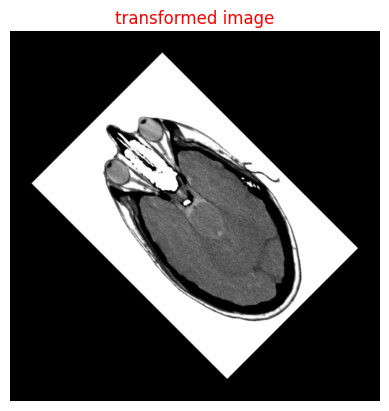

In [4]:
#@title Q4 - Part 1 (25%)
###
image41 = plt.imread("transformed.png")
standardization(image41, "transformed image")

###

Q4 - Part 1 Explanation:
<div dir=rtl>
<font size = "5">تصویر اولیه در ابتدا scale شده و سپس از rotation استفاده شده است</font><br />
</div>

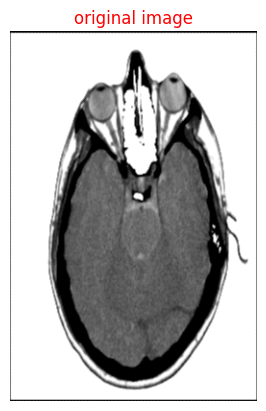

In [5]:
#@title Q4 - Part 2 (40%)
###
gray_image = image41[:, :, 0]
rows, cols = gray_image.shape
M = cv.getRotationMatrix2D((rows/2, cols/2), -45, 1)
dst = cv.warpAffine(gray_image, M, (rows, cols))

image_range = np.where(dst != 0)
first_row = image_range[0][0]
last_row = image_range[0][-1]
fist_col = image_range[1][0]
last_col = image_range[1][-1]
original_image = dst[first_row: last_row + 1, fist_col: last_col + 1]
standardization(original_image, "original image")
###


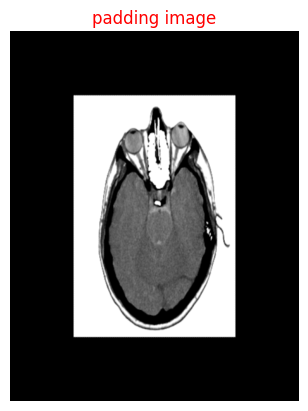

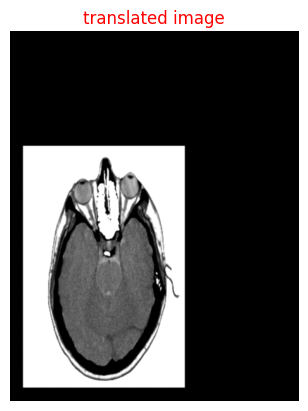

In [6]:
#@title Q4 - Part 3 (35%)
###
padding = 100
new_dim = (original_image.shape[0] + 2*padding, original_image.shape[1] + 2*padding)
padding_image = np.zeros((new_dim[0], new_dim[1]), dtype=np.float32)
padding_image[padding:padding+original_image.shape[0], padding:padding+original_image.shape[1]] = original_image
standardization(padding_image, "padding image")

M_trans = np.float32([
    [1, 0, -80],
    [0, 1, 80]
])
translated_image = cv.warpAffine(padding_image, M_trans, (padding_image.shape[1], padding_image.shape[0]))
standardization(translated_image, "translated image")
###

# Question 5: (20%)

data type = uint8
dimensions = (512, 512)
data type after changing = float64


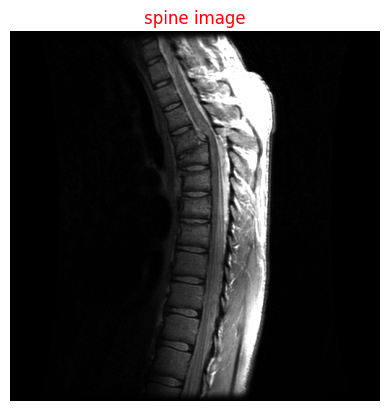

In [7]:
#@title Q5 - Part 1 (10%)
###
spine_img = cv.imread("spine.tif", cv.IMREAD_GRAYSCALE)
print("data type =", spine_img.dtype)
print("dimensions =", spine_img.shape)
spine_img = np.float64(spine_img)
print("data type after changing =", spine_img.dtype)

standardization(spine_img, "spine image")
###

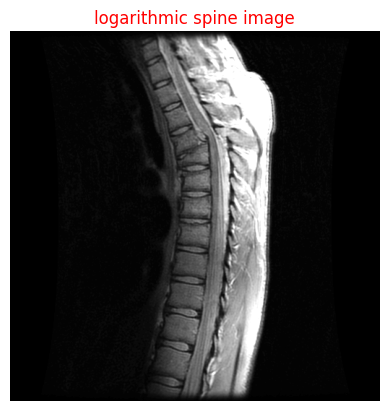

In [8]:
#@title Q5 - Part 2 (10%)
###
def log_transform(image: np.ndarray):
    c = np.amax(image) / np.log(1 + np.amax(image))
    log_image = c * np.log(image)
    return log_image
log_spine = log_transform(spine_img)
standardization(log_spine, "logarithmic spine image")
# print((np.amin(spine_img), np.amax(spine_img)), (np.amin(log_spine), np.amax(log_spine)))
###

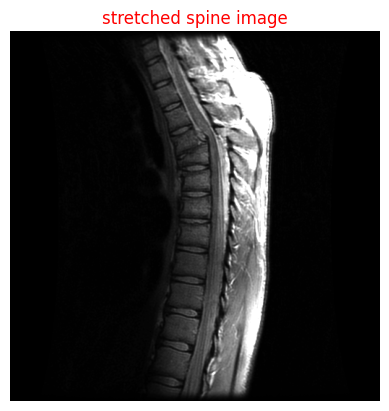

In [9]:
#@title Q5 - Part 3 (30%)
###
def contrast_stretching(image: np.ndarray):
    # y - y0 = m(x - x0)
    r_min = np.amin(image)
    r_max = np.amax(image)
    m = 255 / (r_max - r_min)
    new_image = m*(image - r_min) + 0
    return new_image
stretched_image = contrast_stretching(spine_img)
standardization(stretched_image, "stretched spine image")
# print(np.amin(stretched_image), np.amax(stretched_image))
###

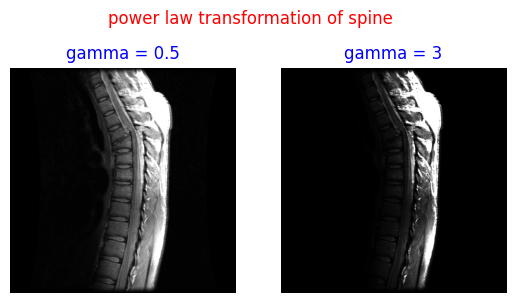

In [10]:
#@title Q5 - Part 4 (15%)
###
def power_law_transform(image: np.ndarray, gamma):
    c = np.power(np.amax(image), 1 - gamma)
    # print(c)
    return np.power(image, gamma) * c

fig, axes = plt.subplots(1, 2)
plt.suptitle("power law transformation of spine", color="red", y=0.85)

axes[0].set_title("gamma = 0.5", color="blue")
g_half = power_law_transform(spine_img, gamma= 0.5)
axes[0].imshow(g_half, cmap="gray", vmin=np.amin(g_half), vmax=np.amax(g_half))
axes[0].axis("off")

axes[1].set_title("gamma = 3", color="blue")
g_3 = power_law_transform(spine_img, gamma= 3)
axes[1].imshow(g_3, cmap="gray", vmin=np.amin(g_3), vmax=np.amax(g_3))
axes[1].axis("off")
plt.show()
# print(np.amin(spine_img), np.amin(g_half), np.amin(g_3))
# print(np.amax(spine_img), np.amax(g_half), np.amax(g_3))
###

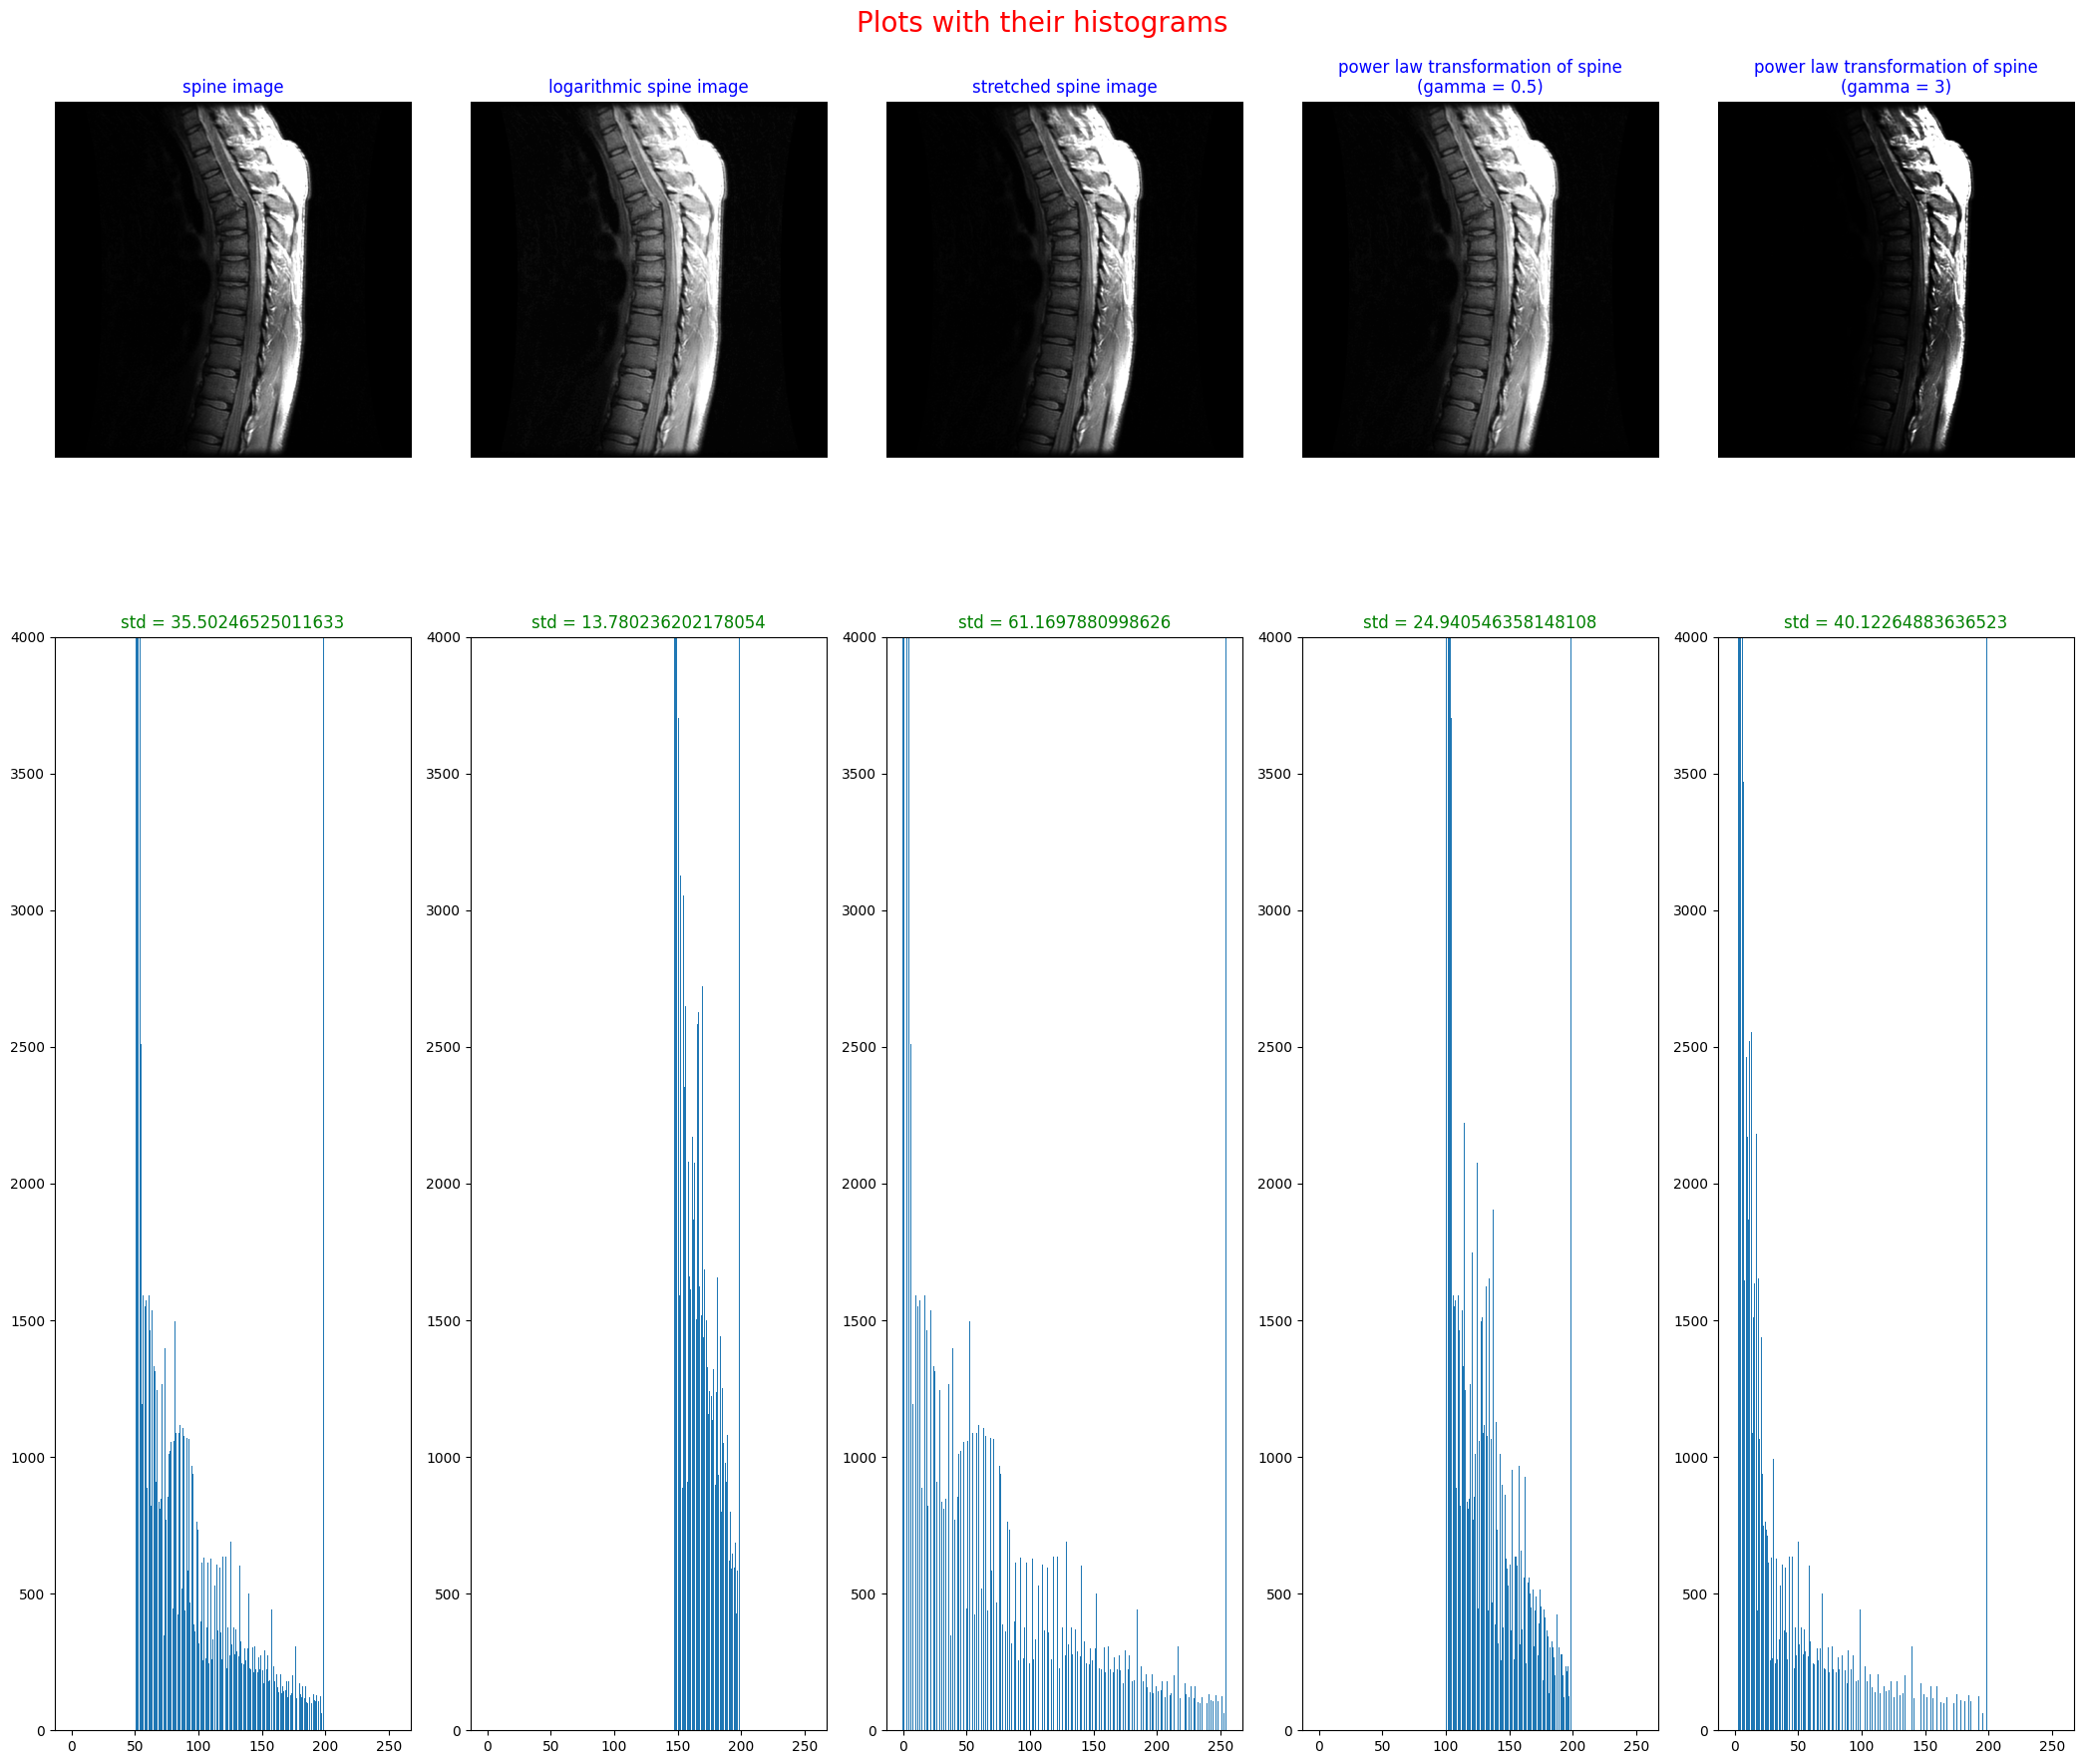

In [11]:
#@title Q5 - Part 5 (15%)
###
fig5, axes5 = plt.subplots(2, 5, figsize=(21, 21))

num_bins = 256
intensity_range = (0, 255)
images_arr = [spine_img, log_spine, stretched_image, g_half, g_3]
titles_arr = ["spine image", "logarithmic spine image", "stretched spine image", "power law transformation of spine\n(gamma = 0.5)",
             "power law transformation of spine\n(gamma = 3)"]
hist_arr = []
bins_arr = []
for i in range(5):
    axes5[0, i].set_title(titles_arr[i], color="blue")
    axes5[0, i].imshow(images_arr[i], cmap="gray", vmin=np.amin(images_arr[i]), vmax=np.amax(images_arr[i]))
    axes5[0, i].axis("off")

    hist, bins = np.histogram(images_arr[i], bins=num_bins, range=intensity_range)
    # print(np.where(hist == max(hist)), max(hist))
    # print(len(hist), len(bins))
    hist_arr.append(hist)
    bins_arr.append(bins)
    axes5[1, i].bar(bins_arr[i][:-1], hist_arr[i])
    axes5[1, i].set_ylim(0, 4000)
    axes5[1, i].set_title(f"std = {np.std(images_arr[i])}", color="green")

plt.suptitle("Plots with their histograms", color="red", y=0.84, fontsize=20)
plt.tight_layout()
plt.show()
###

Q5 - Part 6 Explanation (20%):
<div dir=rtl>
<font size = "5">نکته اول این که من محدوده محور yها رو تا 4000 محدود کردم تا فراوانی شدت‌ها و تفاوت آنها بهتر مشخص شود.

نمودار log transformation: لگاریتیم گرفتن از شدت‌ها باعث می‌شود که تراکم شدت‌ها افزایش یابد و تفاوت اندازه شدت‌ها لگاریتمی و بسیار کمتر شوند. در نتیجه تفاوت بین شدت‌ها واضح‌تر می‌شود و تفاوت رنگ‌های شدت‌ها bold می‌شوند و انحراف از معیار و در نتیجه کنتراست تصویر کاهش می‌یابد. بنابراین تمایز بین جزئیات تصویر کاهش می‌یابد و قسمت‌های روشن، تفاوت چندانی ندارند اما قسمت‌های تاریک، روشن‌تر می‌شود.

نمودار contrast stretching: محدوده شدت‌ها در تصویر افزایش می‌یابد، در نتیجه آن انحراف معیار و کنتراست هم افزایش می‌یابد. جزئیات بهتر نمایش داده می‌شوند و تمایز بین نقاط تاریک و روشن افزایش می‌یابد.

نمودارهای power law transformation: در حالتی که گاما کمتر از 1 است، کنتراست در نواحی تاریک افزایش می‌یابد و در نواحی روشن کم می‌شود. در نتیجه طیف خیلی روشن تا نسبتا تاریک تصویر اولیه، تقریبا روشن دیده می‌شود(روشن‌تر از قبل) و طیف نسبتا تاریک تا کاملا تاریک، به میزان قابل توجهی روشن می‌شوند.

اما در حالتی که گاما بزرگتر از 1 است، کنتراست در نواحی روشن افزایش می‌یابد و در نواحی تارک کم می‌شود و در نتیجه طبف کاملا تاریک تا نسبتا روشن تصویر اولیه، تاریک‌ می‌مانند(تاریک‌تر از قبل) و طیف نسیتا روشن تا کاملا روشن، به میزان قابل توجهی تاریک‌تر می‌شوند.</font><br />
</div>

# Question 6: (35%)

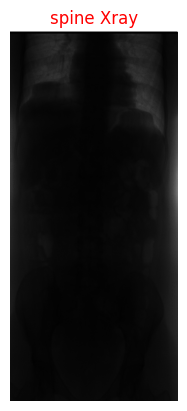

dtype = uint8
dimensions = (706, 320)


In [12]:
#@title Q6 - Part 1 (5%)
###
spine_xray = cv.imread("spineXray.tif", cv.IMREAD_GRAYSCALE)
standardization(spine_xray, "spine Xray")
print(f"dtype = {spine_xray.dtype}")
print(f"dimensions = {spine_xray.shape}")
###

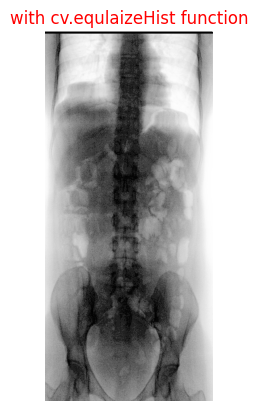

In [13]:
#@title Q6 - Part 2 (5%)
###
equalized_spine = cv.equalizeHist(spine_xray)
plt.imsave("equalizedSpineXray.png", equalized_spine, cmap="gray", vmin=np.amin(equalized_spine), vmax=np.amax(equalized_spine))
standardization(equalized_spine, "with cv.equlaizeHist function")
###

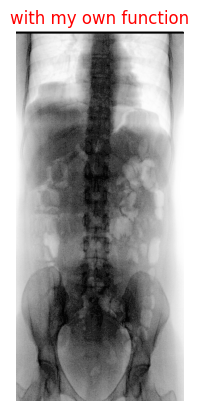

In [14]:
#@title Q6 - Part 3 (25%)
###
def equalizer(image: np.ndarray):
    intensity_length = np.amax(image) - np.amin(image) + 1
    intensity_range = (np.amin(image), np.amax(image))

    histogram = np.array([np.sum(image == i) for i in range(intensity_length)])

    cumulative_histogram = np.cumsum(histogram)
    equalized_intensity = (intensity_length - 1) / image.size * cumulative_histogram

    # equalized_intensity = np.zeros(np.amax(image) - np.amin(image) + 1)
    # for k in range(intensity_length):
    #     sigma_histogram = np.sum(histogram[: k+1])
    #     # print(sigma_histogram, end=",")
    #     equalized_intensity[k] = (intensity_length - 1) / image.size * sigma_histogram
    # equalized_image = np.zeros(image.size)

    flattened_image = image.flatten()
    equalized_image = equalized_intensity[flattened_image].reshape(image.shape)
    return equalized_image

equalized_my_function_image = equalizer(spine_xray)
standardization(equalized_my_function_image, "with my own function")
###

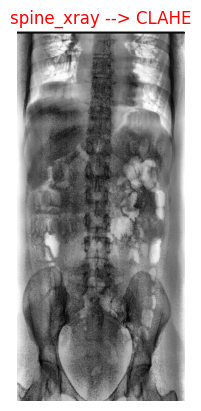

روش CLAHE مخفف Contrast Limited Adaptive Histogram Eqalization است.در این روش equalization در تصویر ورودی به بلوک‌های کوچکی به اسم tile تبدیل می‌شوند و histogram equalization در هر یک از این بلوک‌ها انجام می‌شود. اما این کار می‌تواند باعث ایجاد نویز
در قسمت‌هایی از تصویر که روشن‌تر هستند، شود. برای جلوگیری از این نویز از یک ورودی به نام clipLimit استفاده می‌کند که به صورت دیفالت 40 است و به معنای این است که در صورتی که contrast
 از 40 بزرگتر شود، آن را بریده و به بقیه binهای histogram به صورت یکنواخت قبل از عملیات histogram equalization اضافه می‌کند.
 ورودی دیگری هم به نام tileGridSize میتواند دریافت کند که نشان دهنده اندازه پنجره equalization است و به صورت دیفالت 8,8 است.


In [15]:
#@title Q6 - Part 4 (20%)
###
clahe = cv.createCLAHE(clipLimit=40, tileGridSize=(8, 8))
spine_xray_clahe = clahe.apply(spine_xray)
standardization(spine_xray_clahe, "spine_xray --> CLAHE")
description = """روش CLAHE مخفف Contrast Limited Adaptive Histogram Eqalization است.در این روش equalization در تصویر ورودی به بلوک‌های کوچکی به اسم tile تبدیل می‌شوند و histogram equalization در هر یک از این بلوک‌ها انجام می‌شود. اما این کار می‌تواند باعث ایجاد نویز
در قسمت‌هایی از تصویر که روشن‌تر هستند، شود. برای جلوگیری از این نویز از یک ورودی به نام clipLimit استفاده می‌کند که به صورت دیفالت 40 است و به معنای این است که در صورتی که contrast
 از 40 بزرگتر شود، آن را بریده و به بقیه binهای histogram به صورت یکنواخت قبل از عملیات histogram equalization اضافه می‌کند.
 ورودی دیگری هم به نام tileGridSize میتواند دریافت کند که نشان دهنده اندازه پنجره equalization است و به صورت دیفالت 8,8 است."""
print(description)
###

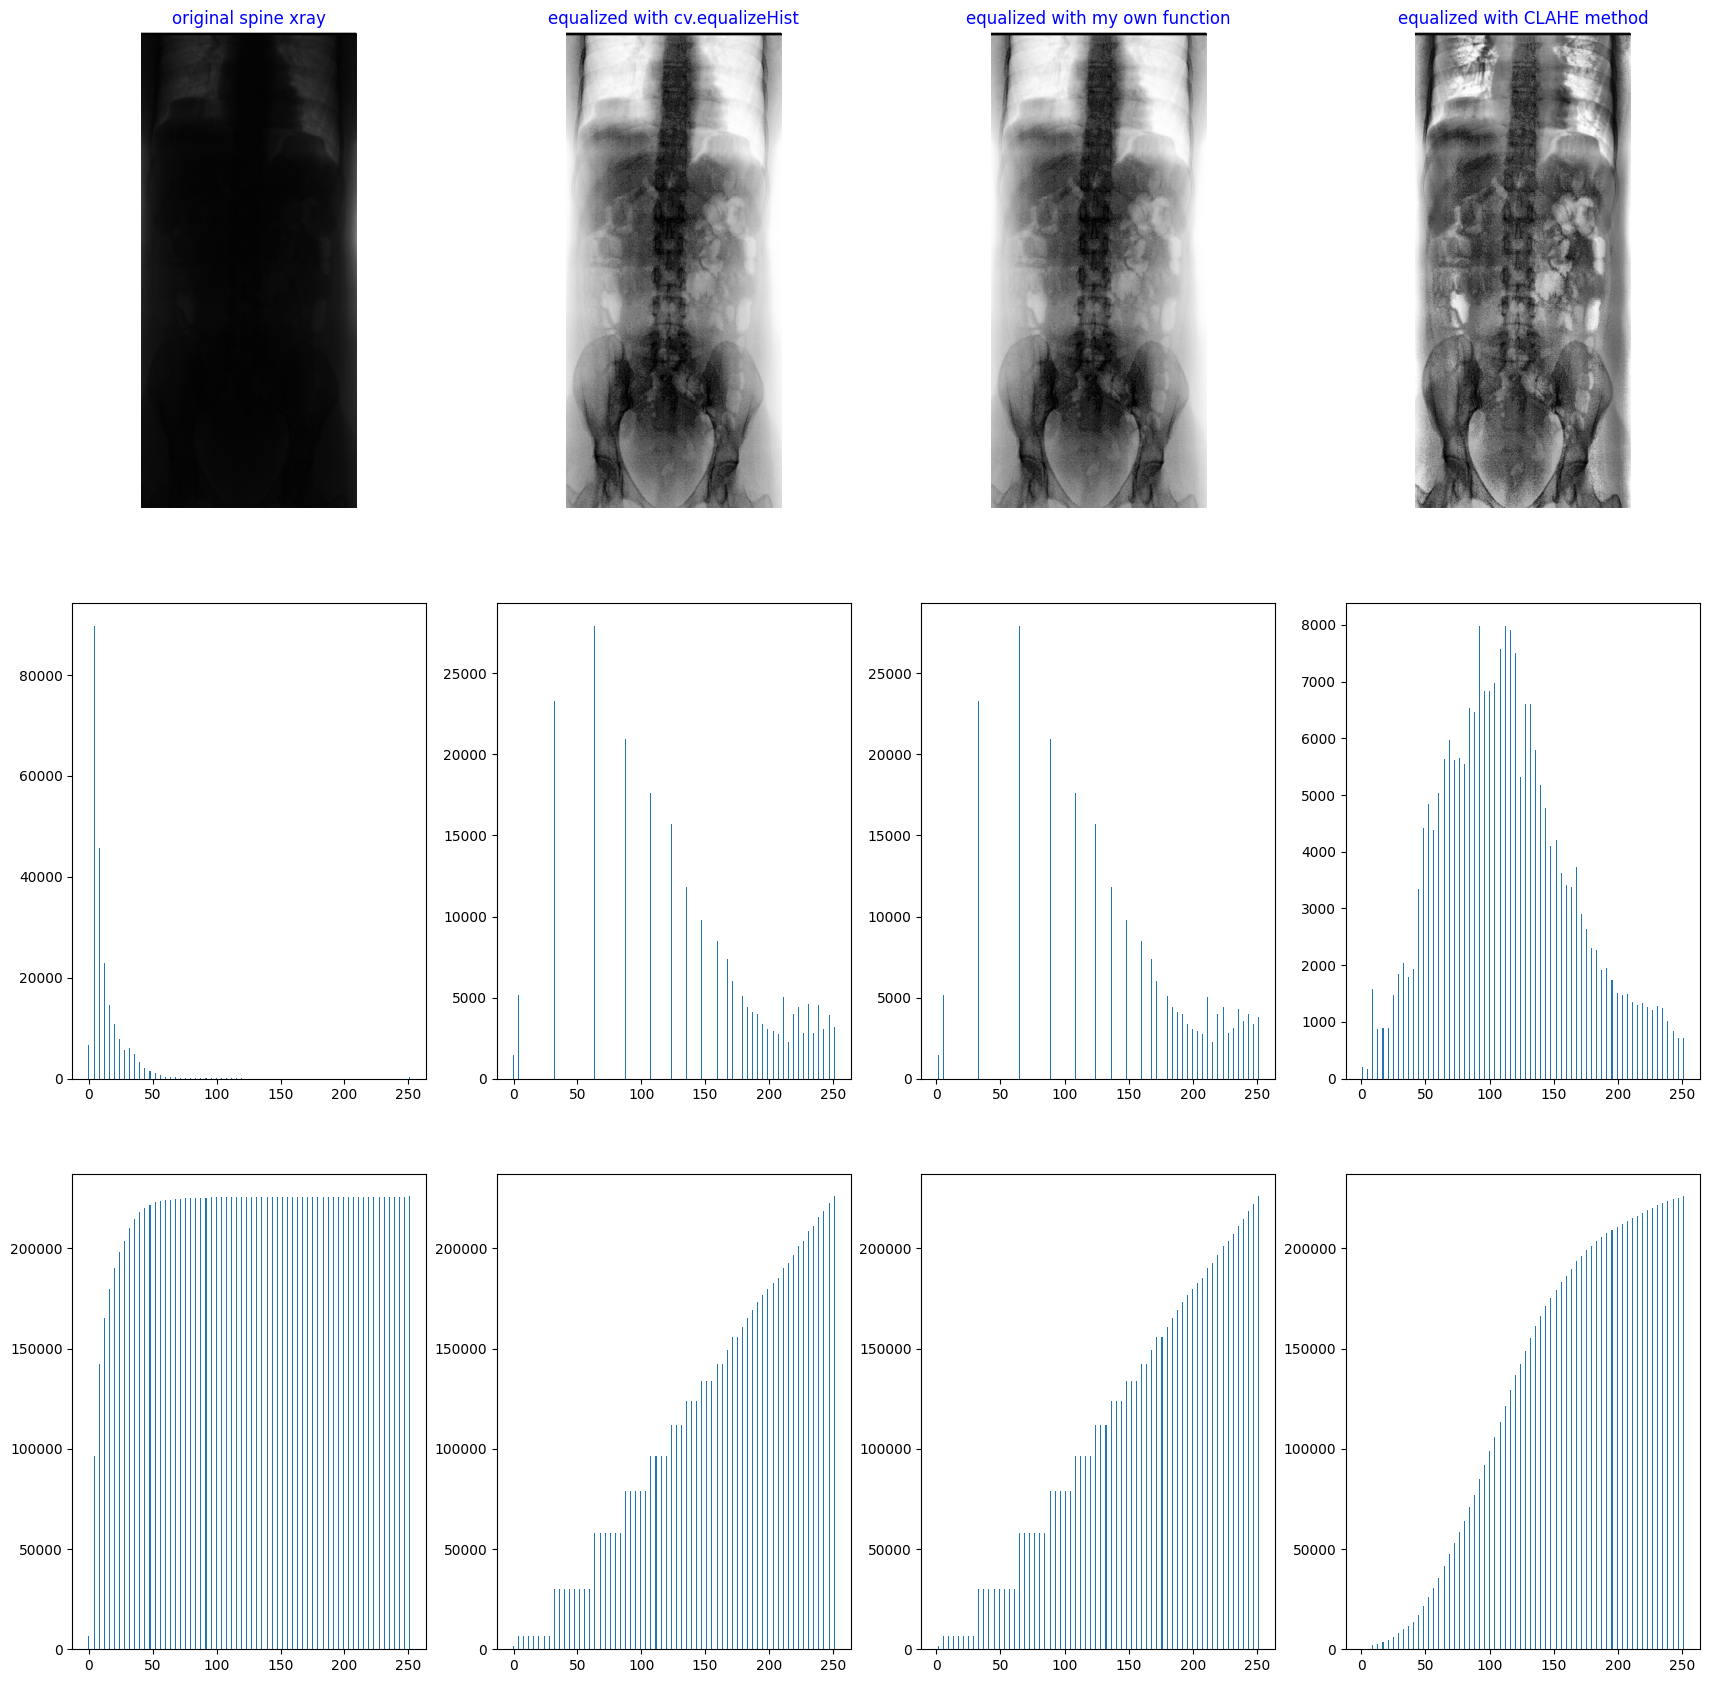

In [16]:
#@title Q6 - Part 5 (10%)
###
fig6, axes6 = plt.subplots(3, 4, figsize=(21, 21))

out_imgs = [spine_xray, equalized_spine, equalized_my_function_image, spine_xray_clahe]
titles = ["original spine xray", "equalized with cv.equalizeHist", "equalized with my own function", "equalized with CLAHE method"]
for i in range(4):
    axes6[0, i].imshow(out_imgs[i], cmap="gray", vmin=np.amin(out_imgs[i]), vmax=np.amax(out_imgs[i]))
    axes6[0, i].set_title(titles[i], color="blue")
    axes6[0, i].axis("off")
    bin_num = (np.amax(out_imgs[i]) - np.amin(out_imgs[i]) + 1) / 4
    bin_num = int(np.ceil(bin_num))
    hist, bins = np.histogram(out_imgs[i], bins=bin_num, range=(np.amin(out_imgs[i]), np.amax(out_imgs[i])))
    axes6[1, i].bar(bins[:-1], hist)

    cum_hist = np.cumsum(hist)
    axes6[2, i].bar(bins[:-1], cum_hist)

plt.show()

###

Q6 - Part 6 Explanation (10%):
<div dir=rtl>
<font size = "5">در تصویر اولیه، فقط شدت‌های پایین استفاده شده‌اند به همین دلیل تصویر تیره است و جزئیات آن مشخص نیست و کنتراست تصویر پایین است.

در تصاویر خروجی ب و پ که تصاویر equalized شده‌اند، فراوانی شدت‌ها در بازه بیشتری پخش شده‌اند و این باعث شده است جزئیات تصویر بهتر نمایش داده شوند و کیفیت تصویر بهتر شده و کنتراست آن افزایش پیدا کند اما همچنان تعداد زیادی از شتد‌ها استفاده نمیشود در نتیجه تفاوت رنگ در تصویر بسیاز زیاد است.

در تصویر خروجی ث علاوه برا equalize شدن فراوانی شدت‌ها، از تکنیک توزیع فراوانی شدت‌ها با توجه به محدوده کنتراست استفاده می‌کند و در نتیجه توزیع فراوانی شدت‌ها روی تمام بازه‌ها پخش می‌شود و مشاهده می‌کنیم که فراوانی تجمعی به صورت smooth و بدون پله بالا می‌رود و نمودار فراوانی عادی هم مشابه منحنی نرمال می‌شود. این فرایند باعث می‌شود که هم کنتراست تصویر افزایش پیدا کند هم جزئیات بهتر نمایش داده شوند و هم تمام قسمت‌های تصویر واضح‌تر شوند.</font><br />
</div>

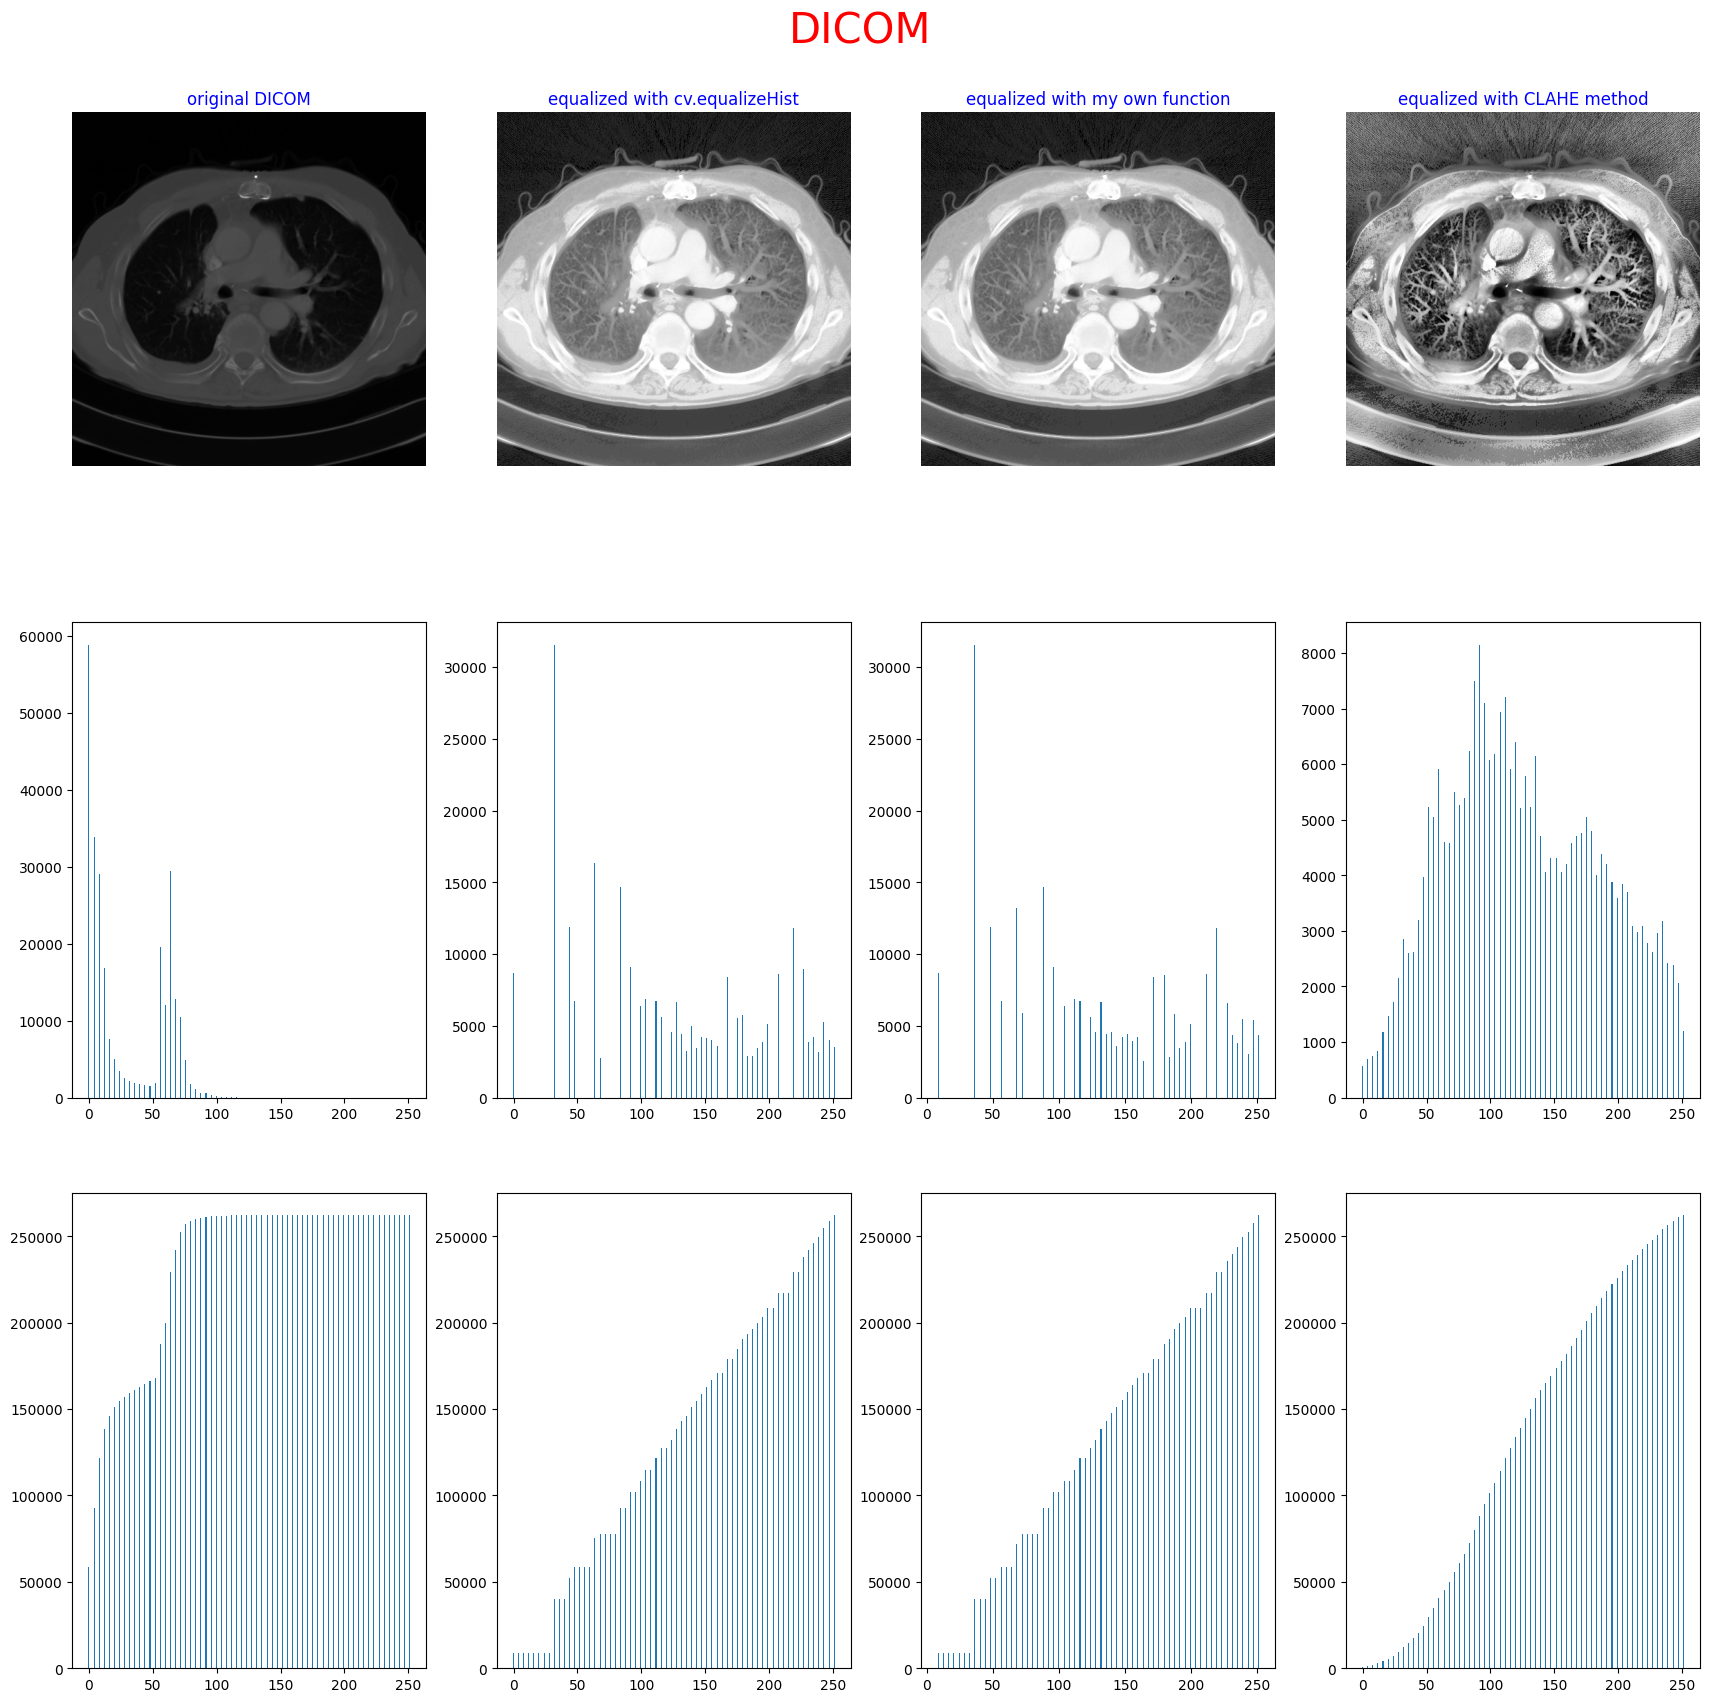

In [21]:
#@title Q6 - Part 7 (25%)
###
ds = pydicom.dcmread("file.dcm")
image_dicom = ds.pixel_array
normalized_dicom = ((image_dicom - image_dicom.min()) / (image_dicom.max() - image_dicom.min())) * 255
normalized_dicom = normalized_dicom.astype("uint8")

fig7, axes7 = plt.subplots(3, 4, figsize=(21, 21))
equalized_dicom = cv.equalizeHist(normalized_dicom)

equalized_dicom_my_func = equalizer(normalized_dicom)

clahe_dicom = cv.createCLAHE(clipLimit=60, tileGridSize=(8, 8))
clahe_dicom_image = clahe_dicom.apply(normalized_dicom)

dicom_imgs = [normalized_dicom, equalized_dicom, equalized_dicom_my_func, clahe_dicom_image]
dicom_titles = ["original DICOM", "equalized with cv.equalizeHist", "equalized with my own function", "equalized with CLAHE method"]
plt.suptitle("DICOM", color="red", fontsize=30, y=0.9)

for i in range(4):
    axes7[0, i].imshow(dicom_imgs[i], vmin=np.amin(dicom_imgs[i]), vmax=np.amax(dicom_imgs[i]), cmap="gray")
    axes7[0, i].set_title(dicom_titles[i], color="blue")
    axes7[0, i].axis("off")
    bin_num = (np.amax(dicom_imgs[i]) - np.amin(dicom_imgs[i]) + 1) / 4
    bin_num = int(np.ceil(bin_num))
    hist, bins = np.histogram(dicom_imgs[i], bins=bin_num, range=(np.amin(dicom_imgs[i]), np.amax(dicom_imgs[i])))
    axes7[1, i].bar(bins[:-1], hist)

    cum_hist = np.cumsum(hist)
    axes7[2, i].bar(bins[:-1], cum_hist)

plt.show()
###

Q6 - Part 7 Explanation:
<div dir=rtl>
<font size = "5">{در ابتدا شدت تصویر را در بازه صفر تا 255 نرمال کردم.
برای قسمت clahe از clip limit 60 استفاده کردم. با این که این کار باعث شده است در قسمت های کاملا مشکی اطراف سوژه نویز ایجاد شود، اما در عوض تمامی جزئیات سوژه برایمان قابل رویت است و میتواند تحلیل تصویر را آسانتر کند.

شدت های تصویر اولیه، نسبت به بخش ث در بازه بیشتری تقسیم شده است.

بقیه توضیحات همانند قسمت قبل است.}</font><br />
</div>

<div dir=rtl>
<font size = "5">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)

</font><br />
</div>


<div dir=rtl>
<font size = "5">
**	حتماً توجه کنید که در هنگام تحویل و آخرین ویرایش روی کد خود، خروجی همه‌ی بلاک‌ها، خروجی درست و نهایی همان بلاک باشد. (بطور مثال ممکن است تغییری در کد بدهید و رویت کنید که خروجی درست نیست و فقط تغییرتان را undo کرده ولی دوباره اجرایش نکنید و خروجی سلول همان خروجی دوم که جواب اشتباهی بود بماند).

</font><br />
</div>


<div dir=rtl>
<font size = "5">	**	نکته مهم: لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font><br />
</div>


<div dir=rtl>
<font size = "5">	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW1_Num باشند که Num شماره دانشجویی شما است مانند HW1_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font><br />
</div>
